In [35]:
import nibabel as nib
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [36]:
epi_img = nib.load('sub-001_brain.nii.gz')

In [37]:
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(208, 256, 256)

In [38]:
data = epi_img_data[100, :, :]
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

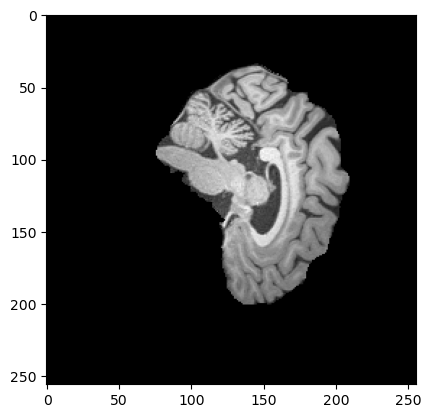

In [39]:
plt.imshow(data, cmap='gray')
plt.show()

In [40]:
data_norm = data / 255.0

In [41]:
data2 = epi_img_data[120, :, :]
data2_norm = data2 / 255.0

In [42]:
data3 = epi_img_data[80, :, :]
data3_norm = data3 / 255.0

In [43]:
def create_point_cloud(image, z_value, threshold=5/255.0):
    height, width = image.shape
    x, y = np.meshgrid(np.arange(width), np.arange(height))  # Create a meshgrid of image coordinates
    z = np.full_like(x, z_value)  # Create a z-coordinate array with the given z_value
    
    # Flatten the arrays and stack them together
    points = np.stack((x.flatten(), y.flatten(), z.flatten()), axis=-1)
    colors = np.tile(image.flatten()[:, None], (1, 3))

    # Apply threshold to filter out points with a grayscale value of 5 or lower
    mask = image.flatten() > threshold
    points = points[mask]
    colors = colors[mask]
    
    return points, colors

In [45]:
A, A2 = create_point_cloud(data_norm, 0, 80 / 255.0)
B, B2 = create_point_cloud(data2_norm, 20, 80 / 255.0)

In [46]:
c = np.concatenate((A, B))

In [47]:
c

array([[142,  35,   0],
       [143,  35,   0],
       [144,  35,   0],
       ...,
       [151, 202,  20],
       [152, 202,  20],
       [153, 202,  20]])

In [48]:
points = np.empty((0, 3))
colors = np.empty((0, 3))

for i in range(epi_img_data.shape[0]):
    data = epi_img_data[i, :, :]
    data_norm = data / 255.0
    point, color = create_point_cloud(data_norm, i, 100 / 255.0)
    points = np.concatenate((points, point))
    colors = np.concatenate((colors, color))

In [49]:
# Create the Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

In [50]:
o3d.visualization.draw_geometries([pcd])